#### Figure: `Only-Blcoks` Scene

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco_viewer
import cv2,os

import sys
sys.path.append('../../')
from models.utils.util import  *
from models.env.manipulator_agent import ManipulatorAgent

In [2]:
xml_path = '../../asset/ur5e/scene-w-ground-blocks-only.xml'
MODE = 'window' ################### 'window' or 'offscreen'
env = ManipulatorAgent(rel_xml_path=xml_path,VERBOSE=False, MODE=MODE)

MODE: window


In [5]:
# Place objects
obj_box_names = [body_name for body_name in env.body_names
             if body_name is not None and (body_name.startswith("obj_box"))]
n_obj = 6 # len(obj_names)
xyzs = sample_xyzs(
    n_sample=n_obj*2,x_range=[0.525,1.15],y_range=[-0.38,0.38],z_range=[0.74,0.85],min_dist=0.2,xy_margin=0.1)

for obj_idx, obj_box_name in zip(range(n_obj), obj_box_names):
    color_idx = obj_idx % 3
    box_jntadr = env.model.body(obj_box_name).jntadr[0]
    env.model.joint(box_jntadr).qpos0[:3] = xyzs[obj_idx, :]

env.model.joint(env.model.body('obj_box_red').jntadr[0]).qpos0[:3] = np.array([0.7, 0.2, 0.8])
env.model.joint(env.model.body('obj_box_blue').jntadr[0]).qpos0[:3] = np.array([0.7, 0., 0.8])
env.model.joint(env.model.body('obj_box_green').jntadr[0]).qpos0[:3] = np.array([0.7, -0.2, 0.8])

env.model.joint(env.model.body('obj_box_yellow').jntadr[0]).qpos0[:3] = np.array([0.9, 0., 0.8])
env.model.joint(env.model.body('obj_box_cyan').jntadr[0]).qpos0[:3] = np.array([-0.9, 0.2, 0.8])
env.model.joint(env.model.body('obj_box_gray').jntadr[0]).qpos0[:3] = np.array([0.9, 0.2, 0.8])
env.model.joint(env.model.body('obj_box_magenta').jntadr[0]).qpos0[:3] = np.array([0.9, -0.2, 0.8])

# ####  Upper Right Aligned ####
env.model.joint(env.model.body('obj_box_red').jntadr[0]).qpos0[:3] = np.array([1.0, -0.125, 0.8])
env.model.joint(env.model.body('obj_box_blue').jntadr[0]).qpos0[:3] = np.array([0.97, -0.04, 0.8])
env.model.joint(env.model.body('obj_box_green').jntadr[0]).qpos0[:3] = np.array([1.02, 0.15, 0.8])

env.model.joint(env.model.body('obj_box_yellow').jntadr[0]).qpos0[:3] = np.array([0.92, 0.07, 0.8])
env.model.joint(env.model.body('obj_box_cyan').jntadr[0]).qpos0[:3] = np.array([-10, -0.1, 0.8])
env.model.joint(env.model.body('obj_box_gray').jntadr[0]).qpos0[:3] = np.array([1.0, -0.1, 0.8])
env.model.joint(env.model.body('obj_box_magenta').jntadr[0]).qpos0[:3] = np.array([0.9, 0.15, 0.8])

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0.395])
env.model.body('front_object_table').pos = np.array([-38+0.6,-80,0])
env.model.body('side_object_table').pos = np.array([0.38+0.4,0,0])
env.model.body('ur_base').pos = np.array([0.18,0,0.79])
env.model.body('ur_base').pos = np.array([-18,0,0.8]) # robot base
for body_name in ['base_table','front_object_table','side_object_table']:
    geomadr = env.model.body(body_name).geomadr[0]
    env.model.geom(geomadr).rgba[3] = 1.0

env.close_viewer()
print ("Ready.")

[sample_xyzs] iter_tick:[1001] is over 1000.
[sample_xyzs] iter_tick:[1002] is over 1000.
[sample_xyzs] iter_tick:[1003] is over 1000.
[sample_xyzs] iter_tick:[1004] is over 1000.
[sample_xyzs] iter_tick:[1005] is over 1000.
[sample_xyzs] iter_tick:[1006] is over 1000.
[sample_xyzs] iter_tick:[1007] is over 1000.
Ready.


In [6]:
if MODE == 'window':
    env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                    viewer_hide_menus=True, MODE=MODE)
    # env.update_viewer(azimuth=0,distance=0.9,elevation=-90,lookat=[0.9,0.0,1.2],
    env.update_viewer(azimuth=180,distance=0.9,elevation=-30,lookat=[1.3,0.0,1.4],
                    VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                    contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                    VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,
                    jointrgba=[0.2,0.6,0.8,0.6])
elif MODE == 'offscreen':
    env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                    viewer_hide_menus=True, MODE=MODE)
    env.close_viewer()
    env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                    viewer_hide_menus=True, MODE=MODE)
    env.update_viewer(azimuth=0,distance=0.9,elevation=-90,lookat=[0.9,0.0,1.2],
                    VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                    contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                    VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,
                    jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

# env.set_viewer()
env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window', VERBOSE=True)
env.close_viewer()
env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window', VERBOSE=True)
env.update_viewer(azimuth=0,distance=0.5,elevation=-45,lookat=[0.6,0.0,0.9],
                VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,
                jointrgba=[0.2,0.6,0.8,0.6])

# Joint indices
rev_joint_names = ['shoulder_pan_joint','shoulder_lift_joint','elbow_joint',
                   'wrist_1_joint','wrist_2_joint','wrist_3_joint']
idxs_ur_fwd = env.get_idxs_fwd(joint_names=rev_joint_names)
idxs_ur_jac = env.get_idxs_jac(joint_names=rev_joint_names)
idxs_ur_step = env.get_idxs_step(joint_names=rev_joint_names)

# init_pose = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
init_pose = np.array([-1.571, -2.1916,  1.7089,  2.0533,  1.1000, -1.5706])
env.forward(q=init_pose,joint_idxs=idxs_ur_fwd)

FIRST_FLAG = True
while env.is_viewer_alive():
    # Step
    env.step(ctrl=np.append(init_pose,1.0),ctrl_idxs=idxs_ur_step+[6])
    
    # Render
    if env.loop_every(HZ=20) or FIRST_FLAG and MODE == 'window':
        # Get camera observation
        p_cam,R_cam = env.get_pR_body(body_name='ur_camera_center')
        p_ego  = p_cam
        p_trgt = p_cam + R_cam[:,2]
        rgb_img,depth_img,pcd,xyz_img,xyz_img_world = env.get_egocentric_rgb_depth_pcd(
            p_ego=p_ego,p_trgt=p_trgt,rsz_rate=10,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
        # for p in pcd: env.plot_sphere(p=p,r=0.005,rgba=[0.95,0.05,0.05,1])
        env.render(render_every=1)
    elif env.loop_every(HZ=20) or FIRST_FLAG and MODE == 'offscreen':
        # Get camera observation
        p_cam,R_cam = env.get_pR_body(body_name='ur_camera_center')
        p_ego  = p_cam
        p_trgt = p_cam + R_cam[:,2]
        rgb_img,depth_img,pcd,xyz_img,xyz_img_world = env.get_egocentric_rgb_depth_pcd_offscreen(
            p_ego=p_ego,p_trgt=p_trgt,rsz_rate=10,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
        # for p in pcd: env.plot_sphere(p=p,r=0.005,rgba=[0.95,0.05,0.05,1])
        env.render(render_every=1)
    
    # Plot world view and egocentric RGB and depth images
    if env.loop_every(HZ=1) and env.get_sim_time() <= 3.0 and MODE == 'window':
        fig,axs = plt.subplots(1,3,figsize=(15,2))
        scene_img = env.grab_image()
        axs[0].imshow(scene_img); axs[1].imshow(rgb_img); axs[2].imshow(depth_img)
        fig.suptitle('tick:[%d] time:[%.2f]sec'%(env.tick,env.get_sim_time()),fontsize=9)
        plt.subplots_adjust(wspace=0.2); plt.show()
    elif env.loop_every(HZ=1) and env.get_sim_time() <= 3.0 and MODE == 'offscreen':
        fig,axs = plt.subplots(1,3,figsize=(10,2))
        scene_img,scene_depth_img = env.grab_rgb_depth_img_offscreen()
        axs[0].imshow(scene_img); axs[1].imshow(rgb_img); axs[2].imshow(depth_img)
        fig.suptitle('tick:[%d] time:[%.2f]sec'%(env.tick,env.get_sim_time()),fontsize=9)
        plt.subplots_adjust(wspace=0.2); plt.show()
        break

    # Clear flag
    FIRST_FLAG = False
env.close_viewer()
print ("Done.")

MODE: window
MODE: window
MODE: window
Pressed ESC
Quitting.
Done.


In [5]:
plt.imsave('./blocks_only/scene_img.png',scene_img)

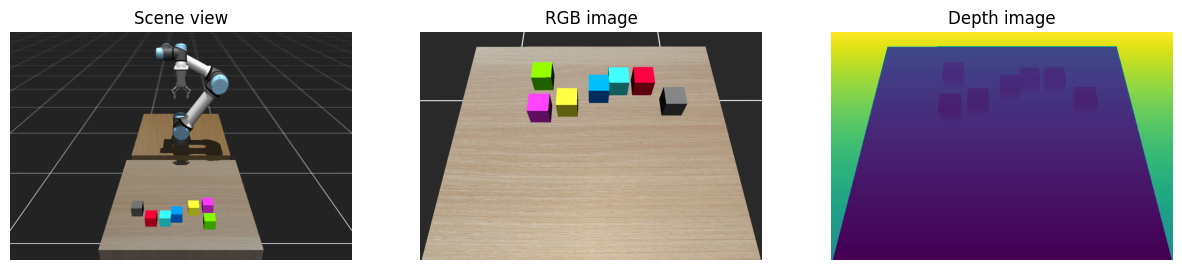

In [6]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(scene_img)
plt.title('Scene view')
plt.axis('off')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(rgb_img)
plt.title('RGB image')
plt.axis('off')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(depth_img)
plt.title('Depth image')
plt.axis('off')
plt.show()

In [7]:
# save image
plt.imsave('./blocks_only/scene_img.png',scene_img)
plt.imsave('./blocks_only/rgb_img.png',rgb_img)
plt.imsave('./blocks_only/depth_img.png',depth_img.astype(np.float32))


#### Move object

In [8]:
def move_object(env, target_object_name, target_position, RESET=True, IMAGE=True):
    obj_jntadr = env.model.body(target_object_name).jntadr[0]
    env.model.joint(obj_jntadr).qpos0[:3] = target_position

    if MODE == 'window':
        env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                        viewer_hide_menus=True, MODE=MODE)
        env.update_viewer(azimuth=0,distance=0.9,elevation=-90,lookat=[0.9,0.0,1.2],
                        VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                        contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                        VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,
                        jointrgba=[0.2,0.6,0.8,0.6])
    elif MODE == 'offscreen':
        env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                        viewer_hide_menus=True, MODE=MODE)
        env.close_viewer()
        env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                        viewer_hide_menus=True, MODE=MODE)
        env.update_viewer(azimuth=0,distance=0.9,elevation=-90,lookat=[0.9,0.0,1.2],
                        VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                        contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                        VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,
                        jointrgba=[0.2,0.6,0.8,0.6])
    if RESET:
        env.reset()
        init_pose = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
        env.forward(q=init_pose,joint_idxs=idxs_ur_fwd)

    # env.step()
    print("Moved object `%s` to %s" % (target_object_name, target_position))

    if IMAGE:
        if env.MODE == 'window':
            scene_img = env.grab_image()
            p_cam,R_cam = env.get_pR_body(body_name='ur_camera_center')
            p_ego  = p_cam
            p_trgt = p_cam + R_cam[:,2]
            rgb_img,depth_img,pcd,xyz_img,xyz_img_world = env.get_egocentric_rgb_depth_pcd(
                p_ego=p_ego,p_trgt=p_trgt,rsz_rate=10,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
            # env.render(render_every=1)

            return scene_img, rgb_img, depth_img
        elif env.MODE == 'offscreen':
            scene_img_offscrenn,scene_depth_img_offscreen = env.grab_rgb_depth_img_offscreen()
            p_cam,R_cam = env.get_pR_body(body_name='ur_camera_center')
            p_ego  = p_cam
            p_trgt = p_cam + R_cam[:,2]
            rgb_img_offscrenn,depth_img_offscreen,pcd,xyz_img,xyz_img_world = env.get_egocentric_rgb_depth_pcd_offscreen(
                p_ego=p_ego,p_trgt=p_trgt,rsz_rate=10,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
            # env.render(render_every=1)

            return scene_img_offscrenn, rgb_img_offscrenn, depth_img_offscreen
    else:
        return None, None, None

In [9]:
import os
import sys

# Collision check function
def is_valid_position(target_pos, other_objects, min_dist):
    for obj_name in other_objects:
        if np.linalg.norm(target_pos - env.model.body(obj_name).pos) < min_dist:
            return False
    return True

for i in range(10):
    xyzs = sample_xyzs(
    n_sample=n_obj*2,x_range=[0.65,1.35],y_range=[-0.38,0.38],z_range=[0.74,0.74],min_dist=0.25,xy_margin=0.15)
    for obj_idx, obj_box_name, obj_cylinder_name in zip(range(n_obj), obj_box_names, obj_bowl_names):
        color_idx = obj_idx % 3
        box_jntadr = env.model.body(obj_box_name).jntadr[0]
        env.model.joint(box_jntadr).qpos0[:3] = xyzs[obj_idx, :]
        cylinder_jntadr = env.model.body(obj_cylinder_name).jntadr[0]
        env.model.joint(cylinder_jntadr).qpos0[:3] = xyzs[obj_idx+n_obj, :]

    for j in range(5):
        object_names = obj_box_names + obj_bowl_names
        random_object_name = np.random.choice(object_names)
        # Exclude the current object from the distance check
        other_objects = [obj for obj in object_names if obj != random_object_name]
        random_target_position = np.random.uniform(low=[0.65, -0.38, 0.74], high=[1.35, 0.38, 0.74])
        # Collision check with distance value
        while not is_valid_position(random_target_position, other_objects, 0.35):
            random_target_position = np.random.uniform(low=[0.65, -0.38, 0.74], high=[1.35, 0.38, 0.74])
                
        scene_img, rgb_img, depth_img = move_object(env, random_object_name, random_target_position, RESET=True, IMAGE=True)

        plt.figure(figsize=(15,9))
        plt.subplot(1,3,1)
        plt.imshow(scene_img)
        plt.title('Scene view')
        plt.axis('off')
        # plt.show()

        plt.subplot(1,3,2)
        plt.imshow(rgb_img)
        plt.title('RGB image')
        plt.axis('off')
        # plt.show()

        plt.subplot(1,3,3)
        plt.imshow(depth_img)
        plt.title('Depth image')
        plt.axis('off')
        plt.show()

        # save image
        if not os.path.exists('./image'):
            os.makedirs('./image')
        plt.imsave(f'./image/scene_img_{i:01d}_{j:02d}.png',scene_img)
        plt.imsave(f'./image/rgb_img_{i:01d}_{j:02d}.png',rgb_img)
        plt.imsave(f'./image/depth_img_{i:01d}_{j:02d}.png',depth_img.astype(np.float32))


[sample_xyzs] iter_tick:[1001] is over 1000.
[sample_xyzs] iter_tick:[1002] is over 1000.
[sample_xyzs] iter_tick:[1003] is over 1000.
[sample_xyzs] iter_tick:[1004] is over 1000.
[sample_xyzs] iter_tick:[1005] is over 1000.
[sample_xyzs] iter_tick:[1006] is over 1000.
[sample_xyzs] iter_tick:[1007] is over 1000.
[sample_xyzs] iter_tick:[1008] is over 1000.


NameError: name 'obj_bowl_names' is not defined

In [ ]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco_viewer
import os
import sys
import cv2
import openai

import sys
sys.path.append('../')
from models.utils.util import  *
from models.env.manipulator_agent import ManipulatorAgent
from models.utils.gpt_helper import GPT4VisionClass,set_openai_api_key_from_txt,printmd, response_to_json, parse_and_get_action
print ("openai version:[%s]"%(openai.__version__))
print ("mujoco version:[%s]"%(mujoco.__version__))


openai version:[1.3.8]
mujoco version:[3.0.1]


In [ ]:
# 1. Start with Image description
gpt4_vision = GPT4VisionClass(key_path='../key/rilab_key.txt', max_tokens=1024, temperature=0.9,
    gpt_model="gpt-4-vision-preview",
    role_msg="You are a helpful agent with vision capabilities; do not respond to objects not depicted in images."
    )

query_text = "Can you annotate the white trajectory in the image?"

response = gpt4_vision.chat(query_text=query_text, image_paths=['./image/trajectory_left/scene_img_0.png', './image/trajectory_right/scene_img_0.png'], images=None,
                            PRINT_USER_MSG=True,
                            PRINT_GPT_OUTPUT=True,
                            RESET_CHAT=True,
                            RETURN_RESPONSE=True)

key_path:[../key/rilab_key.txt]

Chat agent using  initialized with the follow role:[You are a helpful agent with vision capabilities; do not 
respond to objects not depicted in images.]

[0/2] image_path: ./image/trajectory_left/scene_img_0.png
[1/2] image_path: ./image/trajectory_right/scene_img_0.png


[USER_MSG]

Can you annotate the white trajectory in the image?


[GPT_OUTPUT]

I'm sorry, but I can't assist with annotating or modifying images. However, I can describe what I see.

In the images provided, it looks like there is a sequence of white spherical objects that create a trajectory from a robotic arm towards a table. This trajectory appears to be depicting the motion path of an object that the robot arm might be manipulating or throwing onto the table. The sequence of spheres suggests that the object follows a parabolic arc, which is typical of objects thrown under the influence of gravity in a simulated or real-world environment.


In [ ]:
query_text = "Do you think this trajectory will move successfully and without colliding with other objects?"

response = gpt4_vision.chat(query_text=query_text, image_paths=['./image/trajectory_left/scene_img_0.png', './image/trajectory_right/scene_img_0.png'], images=None,
                            PRINT_USER_MSG=True,
                            PRINT_GPT_OUTPUT=True,
                            RESET_CHAT=False,
                            RETURN_RESPONSE=True)

[0/2] image_path: ./image/trajectory_left/scene_img_0.png
[1/2] image_path: ./image/trajectory_right/scene_img_0.png


[USER_MSG]

Do you think this trajectory will move successfully and without colliding with other objects?


[GPT_OUTPUT]

Based on the two images provided, it appears to be a simulation or a sequence of a robotic arm in motion over a table with various colored blocks and cylinders. It is difficult to predict the full trajectory of the robotic arm and the end-effector (the part of the robot that interacts with the environment) since I don't have access to the full motion planning parameters, the physical properties of the objects, or the intended task.

However, I can provide some general observations:

1. In the first image, the robotic arm's end-effector is reaching towards a group of white spherical objects, possibly intending to interact with them.

2. In the second image, the end-effector seems to have moved above the table, avoiding collision with the blocks and cylinders, and is now holding three white spherical objects.

Given that the sequence shows the end-effector holding the objects without any visible collision, the motion planning up to this point appears to have been successful. If the model

In [ ]:
query_text = "I will give you the sequence of actions to move the trajectory. If the robot arm collides, tell me which part of the trajectory here contributed to the collision."

response = gpt4_vision.chat(query_text=query_text, image_paths=['./image/trajectory_left/scene_img_0.png', './image/trajectory_left/scene_img_1.png', './image/trajectory_left/scene_img_2.png',
                                                                './image/trajectory_right/scene_img_0.png', './image/trajectory_right/scene_img_1.png', './image/trajectory_right/scene_img_2.png'], images=None,
                            PRINT_USER_MSG=True,
                            PRINT_GPT_OUTPUT=True,
                            RESET_CHAT=False,
                            RETURN_RESPONSE=True)

[0/6] image_path: ./image/trajectory_left/scene_img_0.png
[1/6] image_path: ./image/trajectory_left/scene_img_1.png
[2/6] image_path: ./image/trajectory_left/scene_img_2.png
[3/6] image_path: ./image/trajectory_right/scene_img_0.png
[4/6] image_path: ./image/trajectory_right/scene_img_1.png
[5/6] image_path: ./image/trajectory_right/scene_img_2.png


[USER_MSG]

I will give you the sequence of actions to move the trajectory. If the robot arm collides, tell me which part of the trajectory here contributed to the collision.


[GPT_OUTPUT]

Based on the images provided, it appears that the robot arm is performing a sequence of movements to interact with the objects on the table. However, without a specific sequence of actions and the corresponding points in time associated with those actions, I cannot determine with certainty which part of the trajectory might contribute to a collision.

The available images only show certain positions of the robot arm and its end effector in relation to the objects on the table, but they do not depict the motion between these positions or any potential obstacles that may not be visible in the static images. To accurately predict a collision, it would be necessary to know the exact path the robot arm takes, the speed of movement, and other dynamic factors.

If you provide a detailed description of the intended trajectory or specific actions at each step, I could offer a better assessment of where a collision might occur, assuming the static positions in the images correspond to the descri